In [4]:
# Import libraries and print versions 
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
import sklearn as sk

print("Python {}".format(sys.version))
print("Numpy {}".format(np.__version__))
print("Pandas {}".format(pd.__version__))
print("Scipy {}".format(scipy.__version__))
print("Seaborn {}".format(sns.__version__))
print("Sklearn {}".format(sk.__version__))

Python 3.8.3 (default, Jul  2 2020, 17:30:36) [MSC v.1916 64 bit (AMD64)]
Numpy 1.18.5
Pandas 1.0.5
Scipy 1.5.0
Seaborn 0.10.1
Sklearn 0.23.1


In [5]:
# loading the datasat
data = pd.read_csv('creditcard.csv')
data.shape

(284807, 31)

In [6]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# takes a fraction of the dataset for less processing time (10% and randomly taken samples)
data = data.sample(frac=0.1, random_state=1) 
data.shape

(28481, 31)

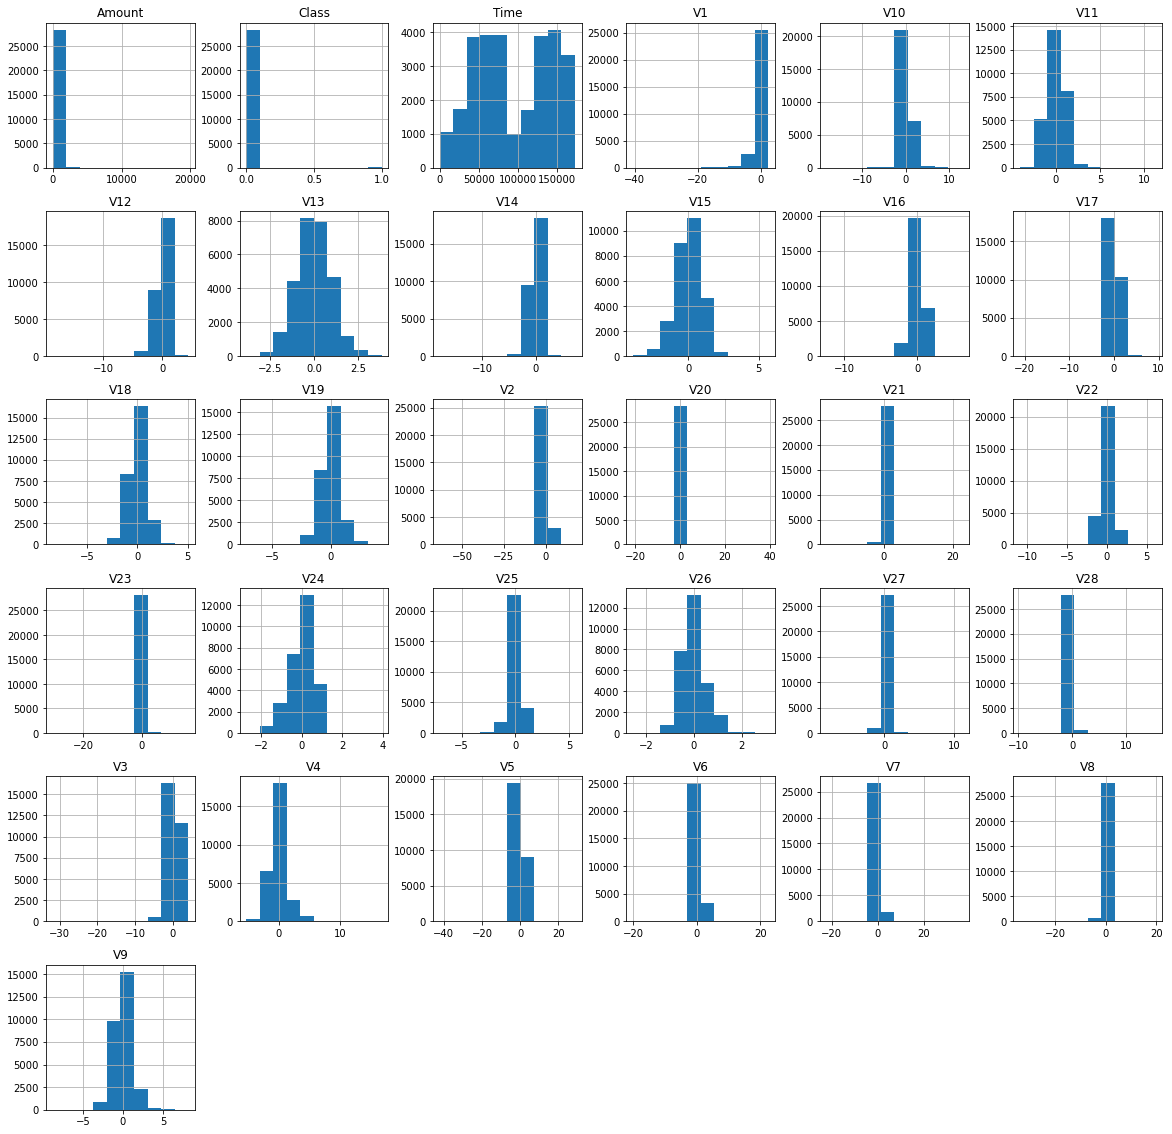

In [8]:
# Plot histogram of each parameter
data.hist(figsize=(20,20))
plt.show()

The histogram shows that most values are inclined to 0 which means most of data are not fraud. 

In [9]:
# Determine th number of fraud and valid cases 
Fraud = data[data['Class'] == 1]
Valid = data[data['Class'] == 0]

outlier_fraction = len(Fraud) / float(len(Valid))
print(outlier_fraction)

print('Fraud Cases: {}'.format(len(Fraud)))
print('Valid Cases: {}'.format(len(Valid)))

0.0017234102419808666
Fraud Cases: 49
Valid Cases: 28432


Correlation matrix: to see if there's strong correlations between different variables in our dataset; if we have to remove outliers or if there are linear relationships; or which features are important

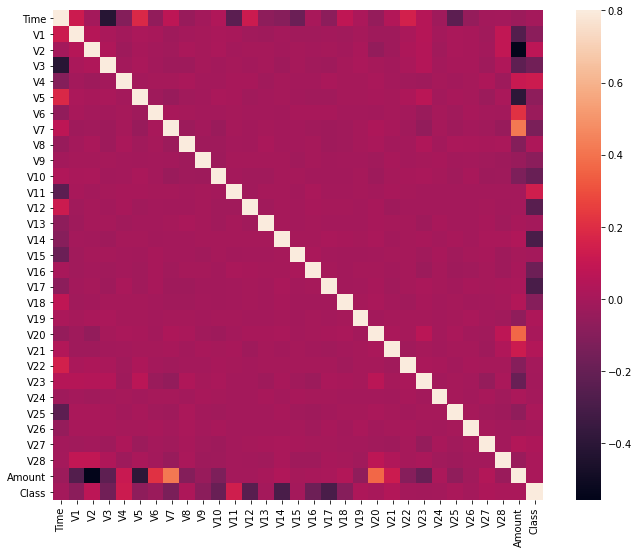

In [10]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax=0.8, square=True)
plt.show()

There's no strong correlation between class and time, and class and amount. some shows strong negative correlations like class and V14, and strong positive correlations like class and V11. 

There's also no sketchy 1:1 correlations so we dont need to pullout columns that would ruin the machine learning.

In [15]:
# Get all columns from the dataframe
columns = data.columns.tolist()

# Filter the columns to remove data we don't want
columns = [c for c in columns if c not in ['Class']]

# Store the value we'll be predicting on 
target = 'Class'

X = data[columns]
Y = data[target]

print("X-shape: {}".format(X.shape))
print("Y-shape: {}".format(Y.shape))

X-shape: (28481, 30)
Y-shape: (28481,)


In [22]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor  

# define a random state
state = 1

neighbors = 20

# defie the outlier detection methods
classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X),
                                       contamination=outlier_fraction,
                                       random_state=state),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=neighbors,
                                              contamination=outlier_fraction)
}

In [24]:
# Fit the model
n_outliers = len(Fraud)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    
    # fit the data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
        
    # Reshape the prediction values to 0 for valid and 1 for fraud
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    
    n_errors = (y_pred != Y).sum()
    
    # Run classification metrics 
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(Y, y_pred))
    print(classification_report(Y, y_pred))

Isolation Forest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

